In [1]:
import os
import pandas as pd

In [2]:
# Put your 'Converted sessions' directory here
directory = 'C:/Users/zoika/OneDrive/Έγγραφα/Master/Modern Data Analytics/Converted sessions'

In [3]:
session = []
year = []
state = []
text = []

In [4]:
for directoryname in os.listdir(directory):
    if directoryname.startswith('Session'):
        for filename in os.listdir(directory + '/' + directoryname):     
            if filename.endswith(".txt"):
                session.append(filename[4:6])
                year.append(filename[7:11])
                state.append(filename[0:3])
        
                f = open(directory + '/' + directoryname + '/' + filename, 'r', encoding="utf8")
                lines = f.read()
                text.append(lines)
                continue
            else:
                continue

In [5]:
df = pd.DataFrame()
df['Session'] = session
df['Year'] = year
df['State'] = state
df['Text'] = text

In [6]:
df.head()

,Session,Year,State,Text
0,25,1970,ALB,33: May I first convey to our President the co...
1,25,1970,ARG,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,"176. No doubt each of us, before coming up to ..."


In [7]:
len(df)

8094

In [8]:
import pdtext
from pdtext.tf import word_count

# Cleaning

In [9]:
import re 
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from textblob import TextBlob
from nltk.corpus import stopwords

In [11]:
def remove_punctuations(docs):
    new_docs = []
    for doc in docs:
        doc = doc.lower() #put the text as lower case
        for c in string.punctuation + "\t" + "\n" +"'" :
            doc = doc.replace(c, " ")
        new_docs.append(doc)
    return new_docs


In [12]:
df['Text'] = remove_punctuations(df['Text'])

In [13]:
df['Text'][0]

'33  may i first convey to our president the congratulations of the albanian delegation on his election to the presidency of the twenty fifth session of the general assembly  34  in taking up the work on the agenda of the twenty  fifth session of the general assembly  which is being held on the eve of the twenty fifth anniversary of the coming into force of the charter of the united nations  the peace loving member states would have wished to be in a position to present on this occasion some picture of positive and satisfactory activity on the part of the united nations  the albanian delegation  for its part  would have taken great pleasure in drawing up such a balance sheet of activities covering a quarter of a century  which is certainly no short period in the life of an international organization  unfortunately  this is not the situation  created on the day after victory had been achieved over the powers of the rome berlintokyo axis and conceived in the spirit of the principles whic

In [14]:
def remove_stopwords(text):
    blob = []
    new_docs = []
    blob = TextBlob(text)
    new_docs = [word for word in blob.words if word not in stopwords.words('english')]
    new_docs = ' '.join(new_docs)
    #blob_clean = TextBlob(new_docs)
    return new_docs

In [15]:
df['Text'] = df['Text'].apply(lambda x: remove_stopwords(x))

In [16]:
df['Text'][184]

'1 mr president glad opportunity today congratulating election office president general assembly one delegation sure fill great distinction 2 like time pay tribute predecessor guided deliberations successfully twenty fifth session general assembly special commemorative session 3 addressed general assembly last year 1857th meeting referred detail progress made south african government implementing promoting ideal self determination different nations comprise population south africa since encouraged display interest developments many quarters including countries africa therefore decided expand remarks year ago 4 last year outlined assembly program political field stressed number years government develop j political institutions various nations south africa early 1951 1959 legislation passed provide various types bantu authorities regional territorial level number authorities established provided valuable experience art government transkei self government conferred far back 1963 since tra

# lemmatizing

In [17]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [18]:
from nltk.corpus import wordnet

In [19]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


In [20]:
df['Text'] = df['Text'].apply(lambda x: lemmatize_sentence(x))

In [21]:
df['Text'][184]

'1 mr president glad opportunity today congratulate election office president general assembly one delegation sure fill great distinction 2 like time pay tribute predecessor guide deliberation successfully twenty fifth session general assembly special commemorative session 3 address general assembly last year 1857th meeting refer detail progress make south african government implement promote ideal self determination different nation comprise population south africa since encourage display interest development many quarter include country africa therefore decide expand remark year ago 4 last year outline assembly program political field stress number year government develop j political institution various nation south africa early 1951 1959 legislation pass provide various type bantu authority regional territorial level number authority establish provide valuable experience art government transkei self government confer far back 1963 since transkei hold two general election 1969 1970 e

In [22]:
df.to_csv('clean_data.csv', index = False)

# Start running from here

The cleaning process takes too much time so I saved the clean data in csv and I use their clean version

In [1]:
import pandas as pd
df = pd.read_csv('clean_data.csv')

In [23]:
df.head()

,Session,Year,State,Text
0,25,1970,ALB,33 may first convey president congratulation a...
1,25,1970,ARG,177 fortunate coincidence precisely time unite...
2,25,1970,AUS,100 pleasure extend mr president warm congratu...
3,25,1970,AUT,155 may begin express ambassador hambro behalf...
4,25,1970,BEL,176 doubt us come rostrum wonder usefulness fu...


In [24]:
len(df)

8094

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8094 entries, 0 to 8093
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Session  8094 non-null   object
 1   Year     8094 non-null   object
 2   State    8094 non-null   object
 3   Text     8094 non-null   object
dtypes: object(4)
memory usage: 253.1+ KB


# Word Clouds

We want to see the main topics that are discussed in the speaches. We expect for some key-words to be mentioned more times than some others

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

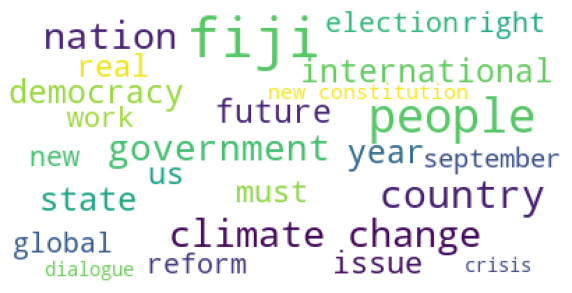

In [29]:
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=25,
                      max_font_size=40,
                      random_state=42).generate(str(df['Text'][6214]))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

Some words are neutral and do not identify a topic such as country and nation. We will except these words to have a clearer view. After a short exploration, the following words seemed to be the more often.

In [30]:
neutral_words = ["united", "nation", "nations", "international", "national", 
                 "country", "world", "mr", "sir", "president", "must", "first", 
                 "organization", "community", "people"]

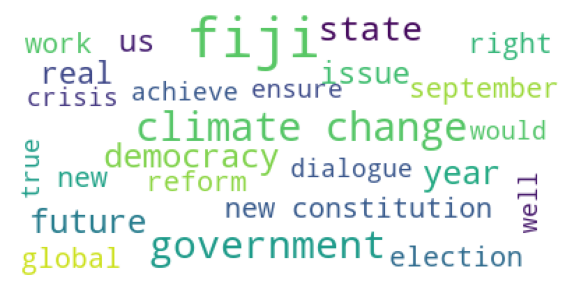

In [32]:
wordcloud = WordCloud(background_color='white',
                      stopwords=neutral_words,
                      max_words=25,
                      max_font_size=40,
                      random_state=42).generate(str(df['Text'][6214]))
fig = plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off');

This word cloud is definitely way more clear about the main discussed topics.

# Word Frequencies

The aim is to find how many times some words are mentioned in the speaches. We will make a matrix with the words as features and the frequency of these words as values.

In [35]:
import seaborn as sns
import pdtext
from pdtext.tf import make_wf_df

In [36]:
wf_df = make_wf_df(df['Text'])

This matrix shows how many times is mentioned any word of the text for each speach. We can use this matrix later to detect which speaches mention the topic of the climate change.

In [37]:
for col in wf_df.columns:
    print(col)

0
00
000
0001
000yearlong
001
003
005
006
007
008
009
00tmunity
00ü
01
010
011
0118
014
02
020
022
023
024
03
030
036
04
041
043
04sj
05
050
05002
0506
054
059
06
060
062
064
069
06itte
06wie
07
070
071
08
087
088
09
090
093
0930
095
099
0a0
0au
0ctober7
0f
0n
0n1ta
0nxc8f
0rgani2ation
0rganization
0s
0th
0ur
0ш
1
10
100
1000
10001
100011
100011add
1002
10023
10027
10040
10070
1008
100th
101
1011
1012
10121
1013
10142
1015
1017
10191
10192
101st
102
10203
10217
10241
10243
10260
1028
102nd
103
10327
103j
103rd
104
1040
10425
1044
1045
104th
105
1052
105223
1054
106
1060
10619
1063
1068
106j
106th
107
1070
1072
1073
1074
10759j
1079
108
1080s
1082
10839
1088
1089
108th
109
1092
1097th
1099
109th
10avi
10international
10j2
10th
10x20
11
110
1100
1103
1106
111
111068
1111
11161
112
1122
1122nd
1125
1127
112th
113
1130
1135
113th
114
1144
114th
115
115th
116
11646
117
1170
11713
1172
1173
118
1180
1182
1184th
1189
118th
119
1192
1193
11974
1198th
1199
119th
11s
11th
12
120
1200
1208
1209
1

In [38]:
len(wf_df.columns)

49929

In [39]:
tfidf_df = make_wf_df(df['Text'], tfidf = True)

In [40]:
wf_df.iloc[5214].sort_values(ascending=False).head(25)

azerbaijan       23
international    14
territory        14
armenia          13
nation           12
security         11
united            9
resolution        9
conflict          8
council           7
azerbaijani       7
karabakh          6
country           6
also              6
law               6
illegal           6
result            6
nagorno           6
1993              5
organization      5
part              5
people            5
settlement        5
occupy            5
state             5
Name: 5214, dtype: int64

In [41]:
tfidf_df.iloc[49].sort_values(ascending=False).head(20)

delegation          0.190561
nation              0.187951
addendum            0.186068
text                0.180167
malaysia            0.177045
circulate           0.163473
philippine          0.162168
united              0.139230
verbatim            0.125601
minute              0.111754
decade              0.110002
survival            0.103031
full                0.098339
lapse               0.094805
human               0.090761
ten                 0.087176
development         0.084105
youth               0.083274
secretarygeneral    0.083248
gap                 0.081637
Name: 49, dtype: float64

First, we will add up the rows and we will group by year and we will make a visualisation with the diferences (if any). Then we will group by country and we will do the same......

# Embedding to detect topics related to global warming

In [42]:
import pandas as pd
import numpy as np
import string
import os
from nltk.tokenize import word_tokenize, sent_tokenize
from random import choices
from time import time

import gensim #library needed for word2vec
from gensim.models import KeyedVectors

C:\Users\zoika\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
def fast_tokenize(text):
    
    # Get a list of punctuation marks
    punct = string.punctuation + '“' + '”' + '‘' + "’"
    
    lower_case = text.lower()
    lower_case = lower_case.replace('—', ' ').replace('\n', ' ')
    
    # Iterate through text removing punctuation characters
    no_punct = "".join([char for char in lower_case if char not in punct])
    
    # Split text over whitespace into list of words
    tokens = no_punct.split()
    
    return tokens

In [45]:
texts = df['Text'].values

In [46]:
print(f'Found {len(texts)} texts.')

# Flatten a list of lists. 
sentences = [s for t in texts for s in sent_tokenize(t)]
print(f'Found {len(sentences)} sentences.')

words_by_sentence = [fast_tokenize(s) for s in sentences]
words_by_sentence = [s for s in words_by_sentence if s != []]
words_by_sentence = [s for s in words_by_sentence if len(s) > 2]


print(f'Found {len(words_by_sentence)} sentences after removing blank ones.')
print('First sentence words:')
print(words_by_sentence[0])

Found 8094 texts.
Found 8094 sentences.
Found 8094 sentences after removing blank ones.
First sentence words:
['135', 'wish', 'congratulate', 'president', 'well', 'deserve', 'election', 'personal', 'quality', 'noble', 'tradition', 'service', 'fundamental', 'value', 'mankind', 'peace', 'characteristic', 'norwegian', 'government', 'give', 'ample', 'claim', 'preside', 'assembly', 'people', 'world', '136', 'wish', 'also', 'congratulate', 'mr', 'angie', 'brook', 'randolph', 'ably', 'direct', 'work', 'twenty', 'fourth', 'session', '137', 'secretarygeneral', 'u', 'thant', 'wish', 'convey', 'coi', 'dial', 'greeting', 'government', 'concern', 'exemplary', 'dedication', 'cause', 'united', 'nation', 'earn', 'gratitude', 'satisfaction', '138', 'also', 'like', 'pay', 'tribute', 'founder', 'organization', 'establish', 'twenty', 'five', 'year', 'ago', 'strengthen', 'unity', 'understanding', 'among', 'men', 'express', 'gratitude', 'admiration', 'fight', 'die', 'two', 'world', 'war', 'defend', 'right',

In [47]:
w2v_model = gensim.models.Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=2)

In [48]:
w2v_model.build_vocab(words_by_sentence, 
                      progress_per=10000)

In [49]:
w2v_model.corpus_total_words

12135875

In [50]:
t = time()

w2v_model.train(words_by_sentence, 
                total_examples=w2v_model.corpus_count, 
                epochs=30, 
                report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 16.41 mins


In [51]:
w2v_model.save('train.bin')

In [52]:
len(w2v_model.wv['climate'])

300

In [53]:
w2v_model.wv['climate'][:10]

array([ 0.756042  , -0.9386702 ,  0.77197134, -0.1110189 , -0.41963693,
        0.9128502 , -0.16021416,  0.45976472,  0.7526623 ,  0.11540709],
      dtype=float32)

In [54]:
w2v_model.wv.most_similar('environment')

[('environmental', 0.6708023548126221),
 ('climate', 0.5716868042945862),
 ('ecosystems', 0.5077387690544128),
 ('sustainable', 0.5009329915046692),
 ('ecology', 0.4996209442615509),
 ('ecological', 0.4983895421028137),
 ('ecosystem', 0.48351559042930603),
 ('development', 0.46867480874061584),
 ('global', 0.44822609424591064),
 ('planet', 0.4421657621860504)]

In [55]:
w2v_model.wv.most_similar('climate')

[('environment', 0.571686863899231),
 ('atmosphere', 0.49687886238098145),
 ('global', 0.49662908911705017),
 ('warming', 0.49375125765800476),
 ('change', 0.4885604977607727),
 ('climatic', 0.439272403717041),
 ('mitigation', 0.41943442821502686),
 ('environmental', 0.4175334870815277),
 ('impact', 0.4103339612483978),
 ('desertification', 0.39723140001296997)]

In [56]:
w2v_model.wv.most_similar('pollution')

[('pollutant', 0.5693284273147583),
 ('contamination', 0.531165361404419),
 ('degradation', 0.48813217878341675),
 ('overpopulation', 0.47965869307518005),
 ('pollute', 0.47964638471603394),
 ('overfishing', 0.4336516261100769),
 ('ozone', 0.40283337235450745),
 ('environmental', 0.3984174132347107),
 ('depletion', 0.3961666226387024),
 ('hazard', 0.39287954568862915)]

In [57]:
w2v_model.wv.most_similar('warming')

[('climate', 0.49375128746032715),
 ('temperature', 0.43482568860054016),
 ('greenhouse', 0.42266231775283813),
 ('desertification', 0.4019870162010193),
 ('acidification', 0.39924532175064087),
 ('adverse', 0.39502352476119995),
 ('emission', 0.3761715888977051),
 ('downturn', 0.3707682490348816),
 ('pollution', 0.36898237466812134),
 ('climatic', 0.3657532334327698)]

In [58]:
showme = ['environment', 'environmental', 'ecosystems', 'ecosystem', 'climate', 'sustainable', 'ecology', 'planet',
          'warming', 'unfccc', 'desertification', 'sustainability', 'warming', 'temperature',
          'warm', 'greenhouse', 'pollutant', 'depletion', 'deforestation', 'acidification', 'pollution', 'overpopulation',
          'ecosystems', 'overfishing', 'contamination', 'pollute', 'atmospheric', 'carbon', 'green', 'energy', 'renewable',
          'biofuels', 'environmentally', 'climatic', 'weather', 'rainfall', 'rain', 'hurricanes']

In [59]:
wf_df[showme].sample(10)

,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,warming,unfccc,...,green,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes
6325,1,2,0,0,6,5,0,0,0,0,...,0,7,0,0,1,0,1,0,0,0
4820,0,0,0,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1616,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7502,0,0,0,1,14,14,0,1,0,2,...,0,0,0,0,0,0,1,0,0,0
6362,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4147,4,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
924,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5667,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


Adding up the rows.

In [60]:
climate_df = pd.DataFrame(wf_df[showme])

In [61]:
climate_df.head()

,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,warming,unfccc,...,green,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
sum_row = climate_df.sum(axis=1)

In [63]:
sum_row

0        0
1        0
2        8
3        4
4        2
        ..
8089    36
8090     1
8091     5
8092     9
8093    13
Length: 8094, dtype: int64

In [64]:
climate = pd.concat([df['Year'], df['State'], climate_df, sum_row], axis=1)

In [65]:
climate = climate.rename(columns={0: 'sum'})
climate.head()

,Year,State,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,...,energy,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes,sum
0,1970,ALB,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1970,ARG,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1970,AUS,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,1970,AUT,1,0,0,0,0,0,0,2,...,1,0,0,0,0,0,0,0,0,4
4,1970,BEL,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [66]:
climate['sum'].describe()

count    8094.000000
mean        6.896714
std         7.349172
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        84.000000
Name: sum, dtype: float64

(0.0, 1770.0)

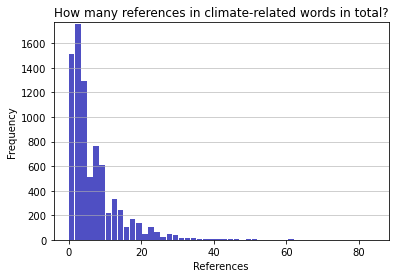

In [67]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=climate['sum'], bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.9)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('References')
plt.ylabel('Frequency')
plt.title('How many references in climate-related words in total?')
#plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [68]:
def classification(data):
    if data < 5:
        classes = 0
    else:
        classes = 1
    return classes

In [69]:
climate['class'] = climate['sum'].apply(lambda x: classification(x))

In [70]:
climate['class'].value_counts()

1    4136
0    3958
Name: class, dtype: int64

We observed that some years are wrongly imported as 001., 012. etc so we will drop these observations.

In [76]:
climate.sort_values(by=['Year'])

,Year,State,environment,environmental,ecosystems,ecosystem,climate,sustainable,ecology,planet,...,renewable,biofuels,environmentally,climatic,weather,rainfall,rain,hurricanes,sum,class
6595,011.,EU_,1,0,0,0,5,2,0,1,...,0,0,0,0,0,0,0,0,10,1
6789,012.,EU_,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
6983,013.,EU_,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,2,0
7176,014.,EU_,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7370,015.,EU_,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,_198,YDY,3,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,8,1
1389,_198,YDY,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1681,_198,YDY,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,2,0,4,0
1830,_198,YDY,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,0


We detected the invalid data so we drop them out.

In [77]:
climate = climate.drop([6595,6789,6983,7176,7370,7562,7758,7954, 306, 816, 956, 1097, 556, 1241, 682, 426, 181,
                       1534, 1980, 2118, 2266, 2418, 2572, 2725, 1389, 1681, 1830, 3048])

<AxesSubplot:xlabel='Year'>

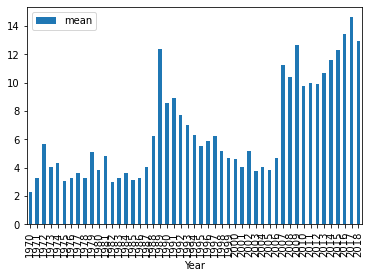

In [78]:
climate.groupby('Year')['sum'].agg(['mean']).plot(kind='bar')

Although we expected an increasing trend in the number of references, we observe an exposion in 1989 and a decreasing patern until 2006. However, from the following year, there is an exploding increase.

In [79]:
mat = climate.groupby('State')['sum'].agg(['mean'])

In [80]:
ref_neg = mat.sort_values('mean').head(35)
ref_pos = mat.sort_values('mean', ascending=False).head(35)

<AxesSubplot:xlabel='State'>

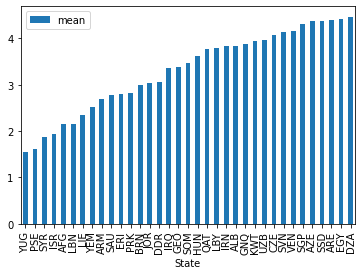

In [81]:
ref_neg.plot(kind='bar')

The majority of the countries that appear on the bar chart are from Middle East. Indeed, Palestine (PSE), Syria (SYR), Israel (ISR), Lebanon(LBN), Afghanistan (AFG), Yemen (YEM) etc are in the first places. Moreover, Yugoslavia (YUG) existed as a state util 1992 so the data are limited. Similarly, East Gernamy (DDR), a state that existed from 1949 to 1990, the period when the eastern portion of Germany was part of the Eastern Bloc during the Cold War. This may be why it appears as one of the countries with the least mentions on the clamate chage topic.

<AxesSubplot:xlabel='State'>

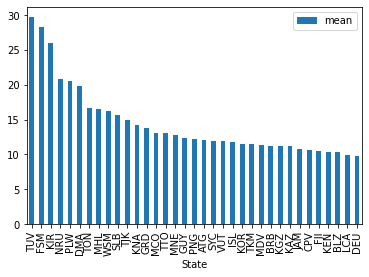

In [82]:
ref_pos.plot(kind='bar')

The first three countries Tuvalu (TUV), Federated States of Micronesia (FSM) and Kiribati (KIR) are islands in Oceania as well as Nauru (NRU), Palau (RLW) and Tong (TON). Some other islands also appeared such as Dominica (DMA) and Grenada (GRD) from Carebean Sea and Iceland (ISL) from North Europe. It is clear that the climate change threatens mostly the islands, ecpecially the ones that are located in Oceania so these countries are more sensitised.

# Topic Modeling

The aim is to conduct a model that predicts the year of a speech. Since predicting the particular year is not that much of interest because the main issues do not vary much from one year to the other, we created a classifiaction model, with periods. First we trained a multiple logistic regration model that classifies the speeches to decades but the accuracy, both in training set and in test set, was very high. Thus, the assumed that there is room for more precision on the time so we classified the speeches in 5-years intervals.

In [83]:
#drop the observations that are wrongly inported
df = df.drop([6595,6789,6983,7176,7370,7562,7758,7954, 306, 816, 956, 1097, 556, 1241, 682, 426, 181,
                       1534, 1980, 2118, 2266, 2418, 2572, 2725, 1389, 1681, 1830, 3048])

In [84]:
df['Year'] = df['Year'].astype(int)

In [85]:
def decade(year):
    if year < 1976:
        return '70-75'
    elif year < 1980:
        return "75-80"
    elif year < 1986:
        return "80-85"
    elif year < 1990:
        return "85-90"
    elif year < 1996:
        return "90-95"
    elif year < 2000:
        return "95-00"
    elif year < 2006:
        return "00-05"
    elif  year < 2010:
        return "05-10"
    elif  year < 2016:
        return "10-15"
    else:
        return "15-18"

In [86]:
df['decade'] = df['Year'].apply(lambda x: decade(x))
df['decade']

0       70-75
1       70-75
2       70-75
3       70-75
4       70-75
        ...  
8089    15-18
8090    15-18
8091    15-18
8092    15-18
8093    15-18
Name: decade, Length: 8066, dtype: object

In [87]:
from sklearn.model_selection import train_test_split

In [91]:
size = round(len(df)*0.7)

In [92]:
# split into train test sets
train, test = train_test_split(df, train_size=size)

In [93]:
train

,Session,Year,State,Text,Count,decade
367,28,1973,ITA,﻿44 mr president may allow outset express deep...,1869,70-75
6464,65,2010,MMR,may behalf myanmar delegation behalf begin ext...,868,10-15
4188,53,1998,KOR,behalf delegation republic korea sincerely con...,1648,95-00
3689,50,1995,NIC,pleasure congratulate sir election presidency ...,1274,90-95
12,25,1970,CRI,62 mr president election presidency assembly c...,2581,70-75
...,...,...,...,...,...,...
70,26,1971,AFG,82 mr president outset wish congratulate whole...,2031,70-75
5733,61,2006,SLB,bring warm greeting government people solomon ...,1395,05-10
961,33,1978,AGO,﻿ 1 analyse agenda thirty third session unite ...,2028,75-80
1088,33,1978,TUR,﻿ 1 mr president behalf government wish expres...,2754,75-80


In [94]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer


pd.set_option('display.max_colwidth', 120)

In [95]:
from sklearn.decomposition import LatentDirichletAllocation

In [96]:
useless_words = ['united', 'nations', 'national', 'international', 'world', 'country', 'countries', 'mr', 'sir']

In [97]:
vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             max_df      = .8,
                             stop_words  = useless_words,
                             min_df      = .005,
                             max_features = None)

In [98]:
vectorizer.fit(train['Text'])

CountVectorizer(max_df=0.8, min_df=0.005,
                stop_words=['united', 'nations', 'national', 'international',
                            'world', 'country', 'countries', 'mr', 'sir'])

In [99]:
len(vectorizer.get_feature_names())

9055

In [100]:
tf = vectorizer.transform(train['Text'])

In [101]:
lda_model = LatentDirichletAllocation(n_components   = 20,
                                      max_iter       = 20,
                                      evaluate_every = 5,
                                      verbose = 1)

In [102]:
lda_model.fit(tf)

iteration: 1 of max_iter: 20
iteration: 2 of max_iter: 20
iteration: 3 of max_iter: 20
iteration: 4 of max_iter: 20
iteration: 5 of max_iter: 20, perplexity: 2319.7012
iteration: 6 of max_iter: 20
iteration: 7 of max_iter: 20
iteration: 8 of max_iter: 20
iteration: 9 of max_iter: 20
iteration: 10 of max_iter: 20, perplexity: 2265.2254
iteration: 11 of max_iter: 20
iteration: 12 of max_iter: 20
iteration: 13 of max_iter: 20
iteration: 14 of max_iter: 20
iteration: 15 of max_iter: 20, perplexity: 2246.0787
iteration: 16 of max_iter: 20
iteration: 17 of max_iter: 20
iteration: 18 of max_iter: 20
iteration: 19 of max_iter: 20
iteration: 20 of max_iter: 20, perplexity: 2235.1411


LatentDirichletAllocation(evaluate_every=5, max_iter=20, n_components=20,
                          verbose=1)

In [103]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(tf))

Log Likelihood:  -48964275.39991327
Perplexity:  2235.1411088530335


In [104]:
lda_model.transform(tf)

array([[3.56633390e-05, 3.56633388e-05, 6.82878912e-02, ...,
        3.56633387e-05, 3.56633389e-05, 3.56633389e-05],
       [1.71229499e-01, 2.82767518e-02, 4.72447925e-02, ...,
        7.78816217e-05, 7.78816218e-05, 7.78816219e-05],
       [5.37211296e-01, 2.71857782e-02, 2.22451570e-01, ...,
        4.07830352e-05, 5.47827705e-02, 4.07830353e-05],
       ...,
       [3.10559014e-05, 3.10559014e-05, 1.67132262e-01, ...,
        3.10559013e-05, 3.10559014e-05, 3.10559013e-05],
       [2.48880045e-05, 2.48880046e-05, 2.48880045e-05, ...,
        2.48880045e-05, 2.48880045e-05, 1.40511526e-01],
       [1.25270796e-01, 1.24279189e-02, 3.97772483e-05, ...,
        3.97772482e-05, 1.09945017e-02, 3.97772484e-05]])

## Training

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns

In [106]:
lr_classifier = LogisticRegression(solver = 'lbfgs', max_iter= 5000)

In [107]:
lr_classifier.fit(tf, train['decade'])

LogisticRegression(max_iter=5000)

In [108]:
prediction = lr_classifier.predict(tf)

In [109]:
print(accuracy_score(train['decade'], prediction))

1.0


In [110]:
print(classification_report(train['decade'], prediction))

              precision    recall  f1-score   support

       00-05       1.00      1.00      1.00       783
       05-10       1.00      1.00      1.00       547
       10-15       1.00      1.00      1.00       811
       15-18       1.00      1.00      1.00       394
       70-75       1.00      1.00      1.00       466
       75-80       1.00      1.00      1.00       385
       80-85       1.00      1.00      1.00       611
       85-90       1.00      1.00      1.00       424
       90-95       1.00      1.00      1.00       713
       95-00       1.00      1.00      1.00       512

    accuracy                           1.00      5646
   macro avg       1.00      1.00      1.00      5646
weighted avg       1.00      1.00      1.00      5646



## Testing

In [111]:
tf_test = vectorizer.transform(test['Text'])

In [112]:
prediction = lr_classifier.predict(tf_test)

In [113]:
print(accuracy_score(test['decade'], prediction))

0.9260330578512397


In [114]:
print(classification_report(test['decade'], prediction))

              precision    recall  f1-score   support

       00-05       0.88      0.92      0.90       338
       05-10       0.90      0.92      0.91       222
       10-15       0.91      0.93      0.92       342
       15-18       0.93      0.89      0.91       189
       70-75       0.96      0.94      0.95       215
       75-80       0.96      0.95      0.96       170
       80-85       0.95      0.96      0.95       260
       85-90       0.93      0.92      0.93       180
       90-95       0.96      0.97      0.96       297
       95-00       0.90      0.85      0.87       207

    accuracy                           0.93      2420
   macro avg       0.93      0.92      0.93      2420
weighted avg       0.93      0.93      0.93      2420



<AxesSubplot:>

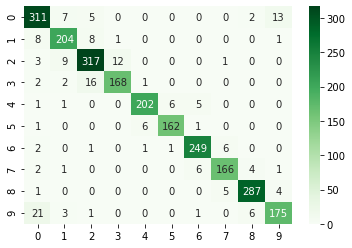

In [115]:
cm = confusion_matrix(test['decade'], prediction)
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')